# Tensorflow & Keras

Eerst moet je tensorflow installeren. Dit kan je doen door in je terminal het volgende commando uit te voeren:
```bash
pip install tensorflow
```


In [18]:
from keras import Sequential, Input
from keras.layers import Dense, BatchNormalization
from tensorflow import keras

# Model bouwen

In [2]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

In [19]:
# maak een "klassiek" Sequential model
# meer lagen toevoegen
model = Sequential()
model.add(Input(shape=(2,)))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Modelopbouw

We kunnen de opbouw van ons model bekijken door de volgende code uit te voeren:
```
model.summary()
```
en ook grafisch met:
```
keras.utils.plot_model(model, to_file='opbouw.png', show_shapes=True)
```
mits we pydot en graphviz geïnstalleerd hebben (Graphviz hebben we al geïnstalleerd tijdens Data Science 1).

```bash
pip install pydot
```
_Nota: je moet je Jupyter Notebook herstarten om de wijzigingen te zien._

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 512)               1536      
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                      

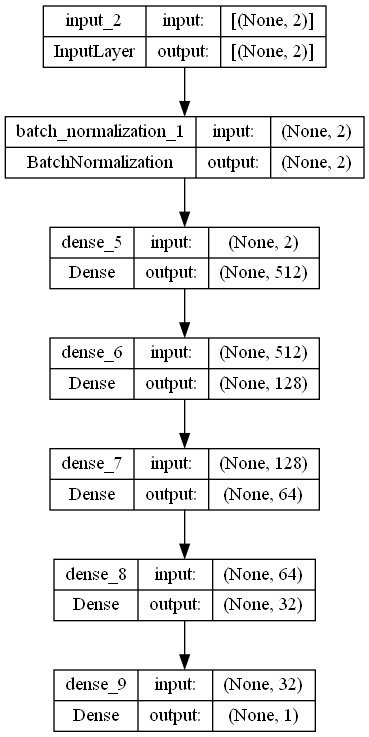

In [20]:
# summary
model.summary()
keras.utils.plot_model(model, to_file='opbouw.png', show_shapes=True)

# Model compileren
Een model moet gecompileerd worden voor het getraind kan worden. Dit is nodig om de loss functie, optimizer en metrics te definiëren.

In [24]:
# compile model
model.compile(
    loss=keras.losses.mean_squared_logarithmic_error, # dit is de loss functie die gebruikt wordt om de error te berekenen
    optimizer=keras.optimizers.Adam(), # dit is de optimizer die gebruikt wordt om de weights aan te passen
    metrics=keras.metrics.mean_absolute_percentage_error # dit is de metriek die gebruikt wordt om het model te evalueren, MAPE
)

# Model trainen

index  quarter  revenue
0      1        1       20
1      2        2      100
2      3        3      175
3      4        4       13
4      5        1       37

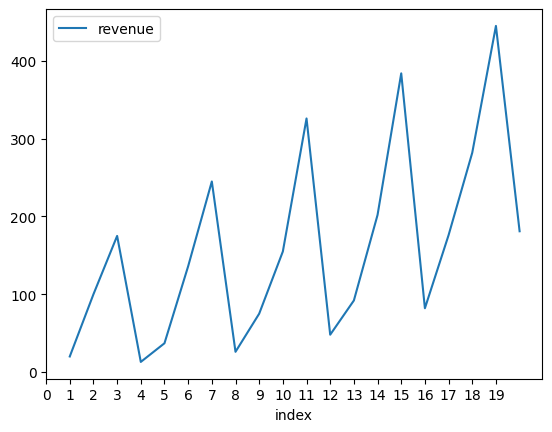

In [25]:
import pandas as pd

data = pd.read_csv('../oefeningen/datasets/forcastdemo.csv')
ax = data.plot(x='index', y='revenue')
ax.set_xticks(data.index)
data.head()

# Trainingsvectoren

We moeten de data nog omzetten naar een formaat dat we kunnen gebruiken om het model te trainen.


In [26]:
X_train = data[['index', 'quarter']]
y_train = data.revenue

# Trainen van het model

We willen de evolutie van de training kunnen volgen op een plot.
Daarom installeren we

```bash
pip install livelossplot
```


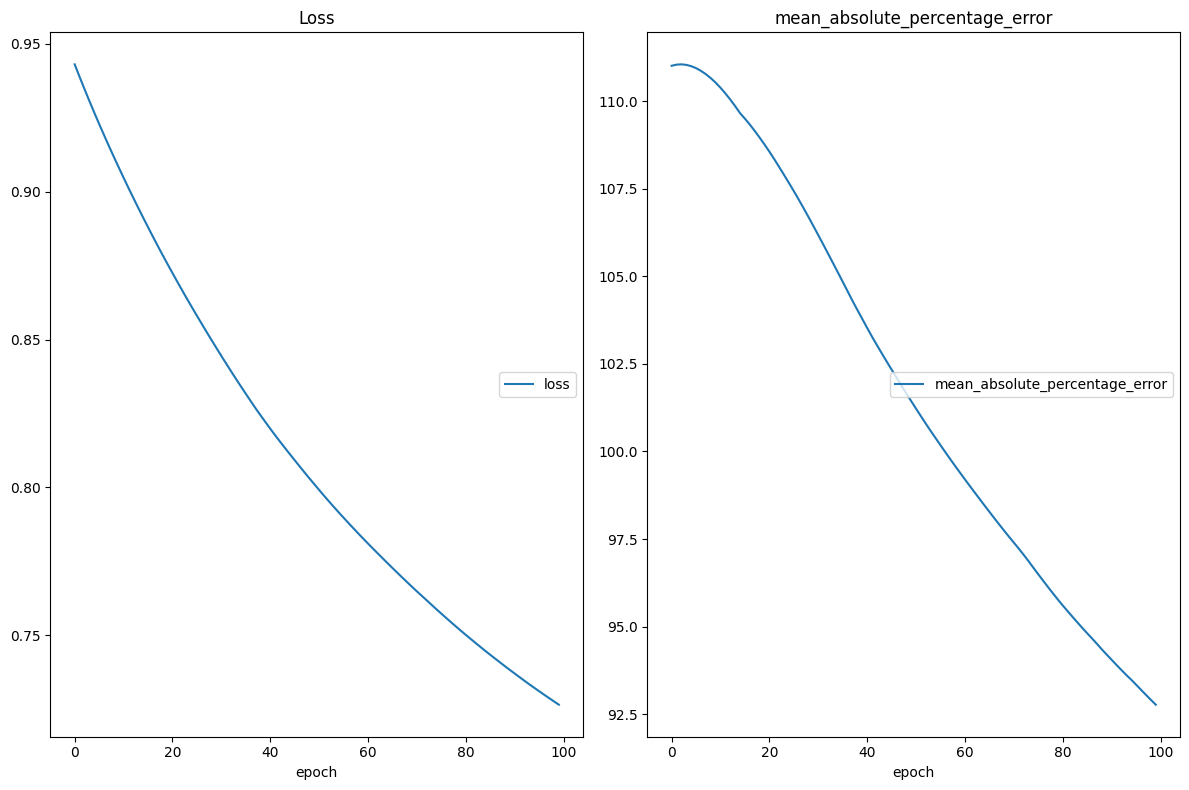

Loss
	loss             	 (min:    0.726, max:    0.943, cur:    0.726)
mean_absolute_percentage_error
	mean_absolute_percentage_error 	 (min:   92.771, max:  111.046, cur:   92.771)


In [28]:
from livelossplot import PlotLossesKeras

history = model.fit(X_train, y_train,
                    batch_size=200,
                    epochs=100,
                    verbose=0,
                    callbacks=[PlotLossesKeras()])

In [29]:
model.evaluate(X_train, y_train)

1/1 [==============================] - 0s 154ms/step - loss: 0.7399 - mean_absolute_percentage_error: 101.8875


[0.7399040460586548, 101.88748931884766]

1/1 [==============================] - 0s 44ms/step


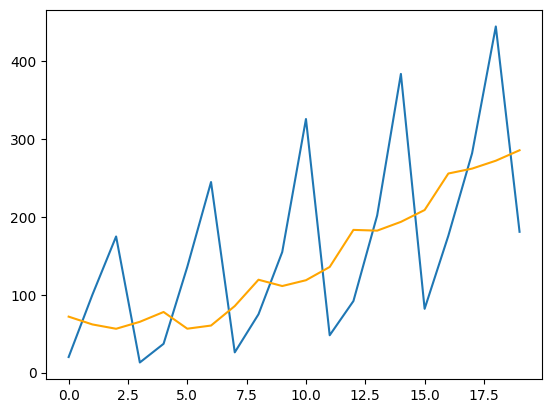

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(data.index, data.revenue)
_ = ax.plot(data.index, model.predict(X_train), color='orange')

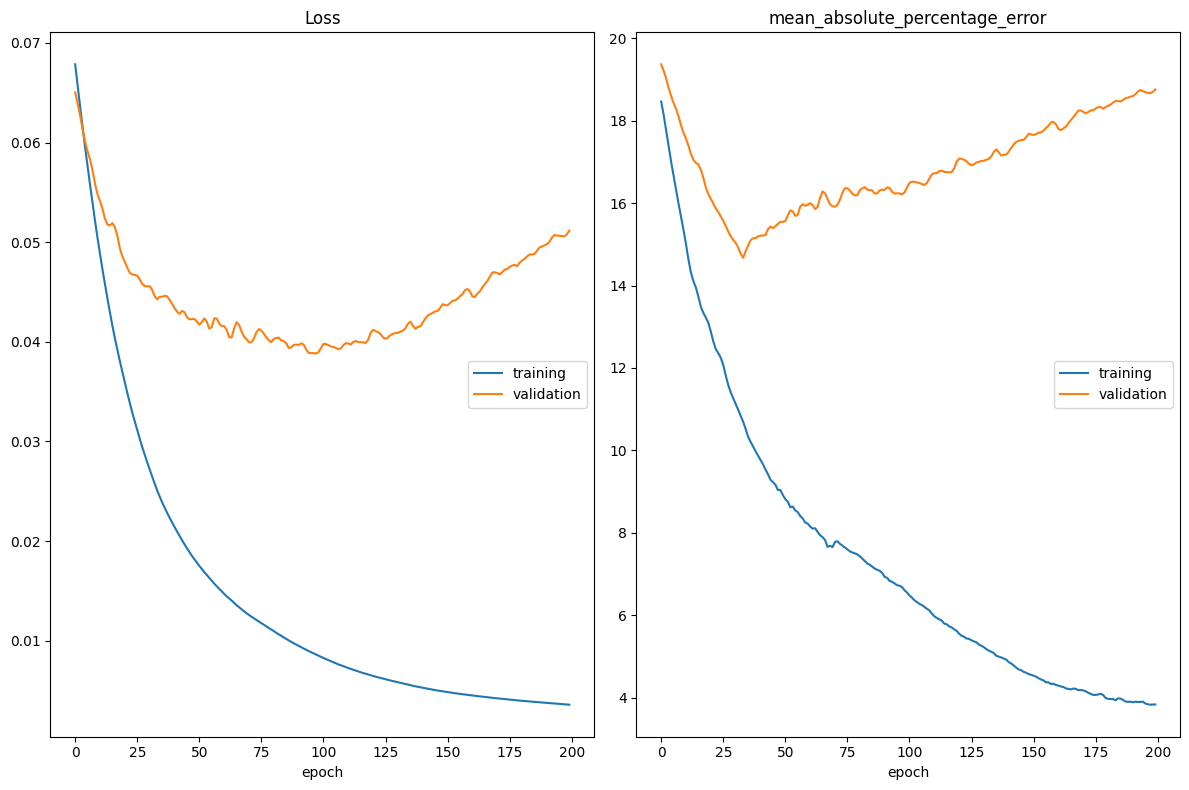

Loss
	training         	 (min:    0.004, max:    0.068, cur:    0.004)
	validation       	 (min:    0.039, max:    0.065, cur:    0.051)
mean_absolute_percentage_error
	training         	 (min:    3.829, max:   18.465, cur:    3.835)
	validation       	 (min:   14.672, max:   19.367, cur:   18.759)


In [34]:
from livelossplot import PlotLossesKeras

_ = model.fit(X_train, y_train,
          validation_split=0.2,
          batch_size=200,
          epochs=200,
          callbacks=[PlotLossesKeras()], verbose=0)

1/1 [==============================] - 0s 22ms/step


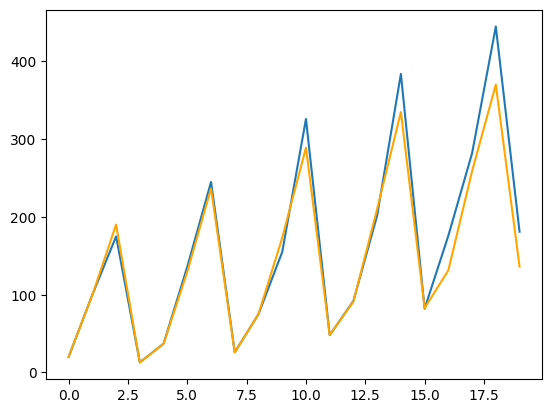

In [35]:
fig, ax = plt.subplots()
ax.plot(data.index, data.revenue)
_ = ax.plot(data.index, model.predict(X_train), color='orange')

# Model saven en herladen


In [36]:
model.save('model.keras')

In [37]:
model = keras.models.load_model('model.keras')